In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
train_data = pd.read_csv("database/B_Data.csv")
X_train = train_data.drop(["Unnamed: 0",  "class"], axis = 1)

In [3]:
test_data = pd.read_csv("database/Test_data.csv")
X_test = test_data.drop(["Unnamed: 0"], axis = 1)

In [4]:
label = []
for i in train_data["class"]:
  if i == "pos":
    label.append(1)
  else:
    label.append(0)

In [5]:
from collections import Counter
Counter(label)

Counter({0: 55934, 1: 1066})

# PCA (Unscaled)

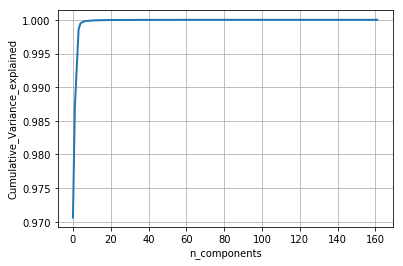

In [6]:
#component 개수 설정
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
exp_var =  np.cumsum(pca.explained_variance_ratio_)

plt.clf()  
plt.plot(exp_var ,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  

plt.show()


#PCA : n=20
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
unsc_pca = pca.fit_transform(X_train)

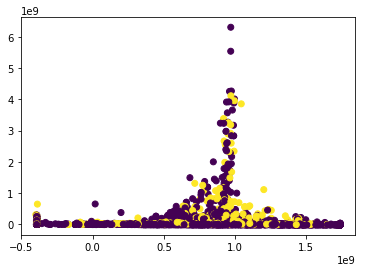

In [8]:
import matplotlib.pyplot as plt

plt.scatter(unsc_pca[:, 0], unsc_pca[:, 1], c= label)
plt.show()

Oversampling

In [10]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_os, Y_train_os = oversample.fit_resample(unsc_pca,np.array(label))

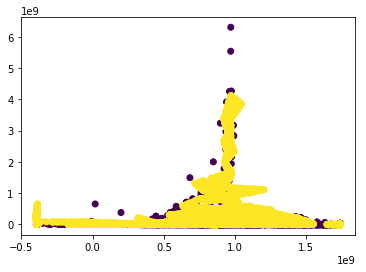

In [12]:
plt.scatter(X_train_os[:, 0], X_train_os[:, 1], c= Y_train_os)
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state = 2020, n_estimators = 5000, max_depth = 15, n_jobs = -1)
rfc.fit(X_train_os, Y_train_os)

RandomForestClassifier(max_depth=15, n_estimators=5000, n_jobs=-1,
                       random_state=2020)

In [19]:
y_pred = rfc.predict(pca.transform(X_test))

In [26]:
pred_class = []
for y in y_pred:
    if y == 0:
        pred_class.append("neg")
    else:
        pred_class.append("pos")

In [27]:
Counter(pred_class)

Counter({'neg': 18226, 'pos': 774})

# Get Data Into Test Set

In [28]:
final_data = pd.read_csv("Test_data_features.csv")

In [29]:
final_data.shape

(19000, 171)

In [30]:
final_data["pred_class"] = pred_class

In [31]:
final_data.to_csv("ML 2조.csv")